---
title: 'Chapter 1: What is an image?'
jupyter: python3
format:
  html:
    embed-resources: true
  pdf:
    documentclass: article
    toc: true
---


# What is an image?

An image is a static snapshot of a scene.  Let us start with an analog image
and work through understating a digital image. An example of an analog image is
a photograph taken with an old fashioned camera on a physical photosensitive
film.  If we were to take a large magnifying glass and zoom in on a really
small area, the colors on the image will change in a very 'smooth' manner
without any discontinuities. Such an image is an analog image, which is in
essence a 'perfect' representation of the captured object where every possible
detail of an image is captured.  

Our computers are extremely good at storing an manipulating massive amounts of
numerical values.  That is they store digital discreet values, and hence
impossible for them to store numerical values for infinitesimally small
intervals when moving along an image. Our computers store a 'digitized' version
of an image. An image is digitized by diving an analog image into grids.  Each
grid represents a pixel, and each pixel stores the average value of the light
falling in that square, that is each pixel stores one value. The smaller the
grid the smaller the area of the image capture by the grid, and hence more
grids are required to cover the entire image. Making the grids smaller
increased the resolution of the image, however it comes at the cost of storing
more values per image (and so increasing the image size). 

In a digital image, at each pixel the intensity 


Obviously, all digital cameras and microscopes do not capture an analog image
and convert them to a digital image, but rater they capture a digital image
directed. The most common methods used for capturing digital images in a
microscope are CMOS-CCD such as used in most wide-field microscopes and PMT
such as used in most confocal microscopes. The details of how these senors work
are irrelevant here, and we obtain a final digital image from them.  

Now that we have divided an image into a fixed number of grids and have the
average intensity at each grid, how are these values actually stored in a
computer and how can we manipulate them?  We will use make extensive use of two
python packages,`numpy` and `scikit-image`, for our image analysis.


## An image is a matrix

### Binary image
As we have seem an image is a grid of pixels. A grid is most easily represented
as matrix. The dimensions of the matrix
corresponding to the size of an image. Each element of the matrix correspond to
a pixel. A two 
dimenstional matrix of size 6 * 8 would represent an image that is 6 pixels
in height and 8 pixels in width, and the intensity is stored at each pixel. 
The images in `ski-image` are represented as `numpy` arrays:

(-0.5, 7.5, 5.5, -0.5)

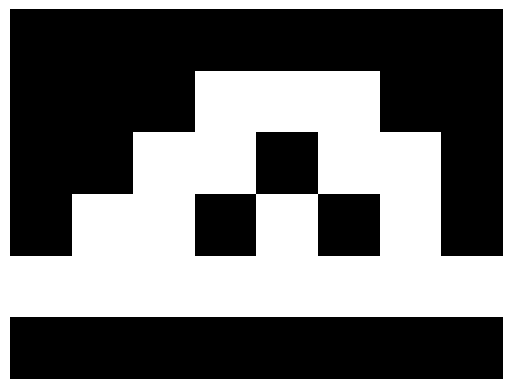

In [3]:
# Load the required packages
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

# A 2D arrary
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 1, 1, 0, 0],
                [0, 0, 1, 1, 0, 1, 1, 0],
                [0, 1, 1, 0, 1, 0, 1, 0],
                [1, 1, 1, 1, 1, 1, 1, 1],
                [0, 0, 0, 0, 0, 0, 0, 0]])

# An we can view an image just like a plot
fig, ax = plt.subplots()
ax.imshow(img, cmap = 'gray')
plt.axis('off')

Here, all the pixels have a value of a `0` or a `1` and it represent just two colors. 
In a binary image, a
`0` typically corresponds to a black pixel and a `1` to a white pixel (however,
these are just arbitrary pseudo-colors for visualization). 

### Grayscale image
A greyscale image is simililarly a matrixm but each pixel can contain a larger range of
vaulues. The minimun value coreesosnds to a balck pixle, the maximum value to a
white pixel, a the values in between repsrest the distinct shades of gray. Therefore,
the larger the range of values, the more shades of gray can be restpresetnsts. 

In the simplest case, let us consider a 2-bit image, where the smallest value at a
pixel is 0 and the 
largest value is $2^2 - 1 = 3$. Here, 0 represents black and 3 represents white,
and 1 and 2 represent shades of gray in between. 

(-0.5, 7.5, 5.5, -0.5)

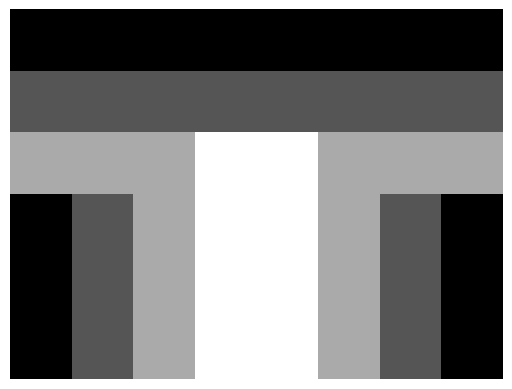

In [2]:
# A 2D image with 4 distinct values
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [1, 1, 1, 1, 1, 1, 1, 1],
                [2, 2, 2, 3, 3, 2, 2, 2],
                [0, 1, 2, 3, 3, 2, 1, 0],
                [0, 1, 2, 3, 3, 2, 1, 0],
                [0, 1, 2, 3, 3, 2, 1, 0]])

# plot the image
fig, ax = plt.subplots()
ax.imshow(img, cmap = 'gray')
plt.axis('off')

In an 8-bit image we can have $2^8 = 256$ distinct values, with 0 being black,
255 being white, and 254 values of gray in between.  Similarly a 16-bit image
can have $2^{16} = 65536$ distinct values. Therefore, as the bit-depth of an
image increases we can it can represent an image with more shades of gray.  
16 bit images are the most typical in mictroscpt, 
though all the concepts are identical irrespective of the image type. 

The figure below shows 2, 4, 8, and 16 bit images, with `0` at the top right and
the maximum value at the bottom left, and each pixel increments by `1`. Notice
how the increment in intensity between adjacet pixles get smaller as the
bit-depth of the image increases. 

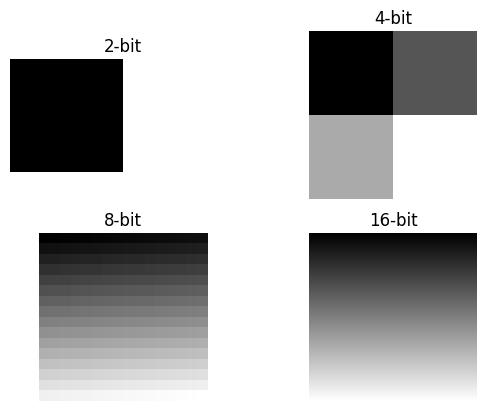

In [3]:
# A 1x2 2-bit image
img_2bit = np.arange(0, 2).reshape(1,2)
# A 2*2 4-bit image
img_4bit = np.arange(0, 4).reshape(2, 2)
# A 16*16 8-bit image
img_8bit = np.arange(0, 256).reshape(16, 16)
# A 256*256 16-bit image
img_16bit = np.arange(0, 65536).reshape(256, 256)

# plot the images
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_2bit, cmap = 'gray')
ax[0, 0].set_title('2-bit')
ax[0, 0].set_axis_off()
ax[0, 1].imshow(img_4bit, cmap = 'gray')
ax[0, 1].set_title('4-bit')
ax[0, 1].set_axis_off()
ax[1, 0].imshow(img_8bit, cmap = 'gray')
ax[1, 0].set_title('8-bit')
ax[1, 0].set_axis_off()
ax[1, 1].imshow(img_16bit, cmap = 'gray')
ax[1, 1].set_title('16-bit')
ax[1, 1].set_axis_off()

## Indexing and manipulating images

Since an image is represented as a matrix, we can similarly manipulate index and manipulate an image just like
manipulating any matrix. The image coordinate `[0, 0]` is at the top left of the image in `numpy`. As the 
x-coordinate increases we go down the image, and as the y-coordinate incresas we go the right of the image. 
A few examples to get started with image indexing are shown below.

(-0.5, 7.5, 7.5, -0.5)

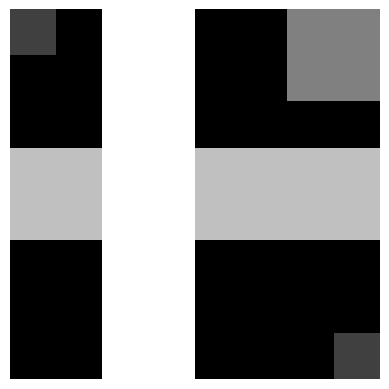

In [40]:
# Create an 8x8 image with all 0s
img = np.zeros((8, 8))

# Index a specific pixel by specifying the both the x and y coordinates
# top left pixel
img[0][0] = 1
# bottom right pixel
img[7][7] = 1

# Index a range of pixels by specifying the start and stop coordinates
# for both x and y coordinates. The coordinates are specired in
# format `start:end-1`.
# Set the top right of the image
img[0:2, 6:8] = 2

# We can access all the columns by specifying ':' as the column index
img[3:5, :] = 3
# We can access all the rows by specifying ':' as the row index
img[:, 2:4] = 4

fig, ax = plt.subplots()
ax.imshow(img, cmap = 'gray', vmax = 4)
plt.axis('off')

## Reading and writing images

Now that we know how to manipulate toy images, let up read in a real image.  We
can read an image using the funcion `io.imread` as a numpy
ndarray, all we need is a path to the image. Once we have the image we can view and 
manipulate it in the same way. 
To write an image we can use the function `io.imsave`, we need the image to
save and the file path.

(1040, 1392)
uint16


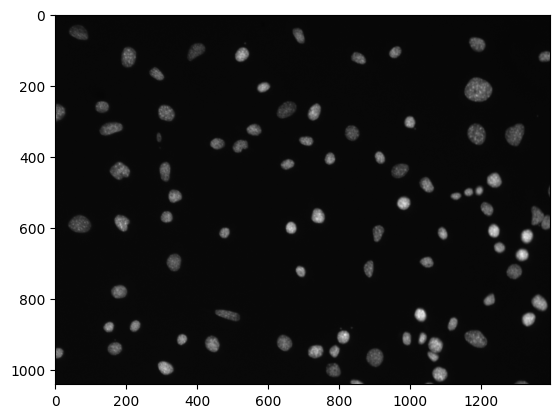

In [52]:
# Read in an image
img = ski.io.imread("data/F01_202w2.TIF")

# we can check the size of the image and the data type
print(img.shape)
print(img.dtype)

# We can similarly view the image using matplotlib
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

# Manipulate the image
img[200:500, 300:400] = 0
img[:, 8] = 0

# Write the manipulated image to file.
ski.io.imsave('data/out.tif', img, check_contrast = False)

In [ ]:
## A note on image formats

In [ ]:
## Exercises